<a href="https://colab.research.google.com/github/TheSpaceMan915/Artificial-Intelligence/blob/main/Lab7_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №7  Колычев Никита  ВПР34**

In [ ]:
#@title Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **Data analysis**

In [ ]:
# loading the dataset
path_file = "/content/drive/MyDrive/Colab Notebooks/AI/Datasets/happiness.csv"
df = pd.read_csv(path_file)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Standard Error'}>],
       [<AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>],
       [<AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Dystopia Residual'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

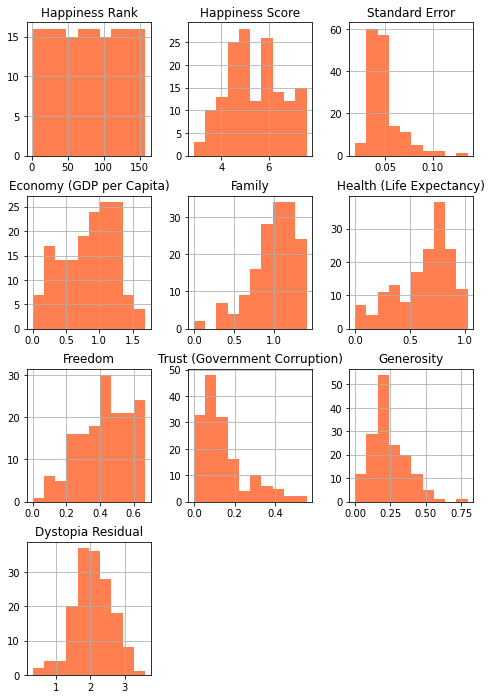

In [ ]:
df.hist(df.columns, figsize=(8, 12), color="coral")

<AxesSubplot:>

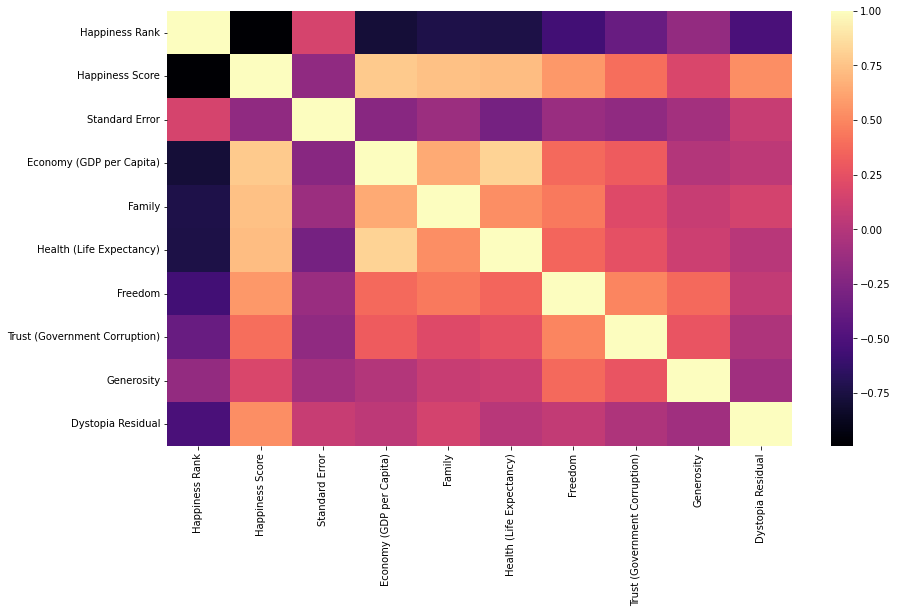

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), cmap=plt.get_cmap("magma"))

In [ ]:
# dropping columns containing strings
series_regions = df["Region"]
df = df.drop("Region", 1)
df = df.drop("Country", 1)
df.head()

<ipython-input-120-3e1c68fdb304>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("Region", 1)
<ipython-input-120-3e1c68fdb304>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("Country", 1)


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# **Задание 1**
Для выбранного и предобработанного датасета из прошлой лабораторной работы произвести классификацию, учитывая особенности моделей и используя: 

*   наивный баессовский классификатор;
*   метод k-ближайших соседей;
*   метод опорных векторов;
*   деревья решений и случайные леса.

# **Naive Bayes classifier**
Naive Bayes classifier is **used to solve classification problems**.

In [ ]:
# training the model
x_train, x_test, y_train, y_test = train_test_split(df, series_regions, test_size=0.3, random_state=0)
classifier_bayes = GaussianNB()
classifier_bayes.fit(x_train, y_train)

series_labels = pd.Series(classifier_bayes.predict(x_test))
print("Some predicted regions:")
series_labels.head()

Some predicted regions:


0                Western Europe
1    Central and Eastern Europe
2            Sub-Saharan Africa
3                 Southern Asia
4                  Eastern Asia
dtype: object

In [ ]:
coefficient_train = round(classifier_bayes.score(x_train, y_train), 2)
coefficient_test = round(classifier_bayes.score(x_test, y_test), 2)
print("coefficient_train:", coefficient_train)
print("coefficient_test:", coefficient_test)

coefficient_train: 0.75
coefficient_test: 0.56


# **K-nearest neighbors**
K-nearest neighbors method is is **used to solve classification problems**, and it's great for small datasets. Can be used as a based model.

In [ ]:
classifier_neighbors = KNeighborsClassifier(n_neighbors=11)
classifier_neighbors.fit(x_train, y_train)

series_labels = pd.Series(classifier_neighbors.predict(x_test))
print("Some predicted regions:")
series_labels.head()

Some predicted regions:


0                 Western Europe
1    Latin America and Caribbean
2             Sub-Saharan Africa
3             Sub-Saharan Africa
4     Central and Eastern Europe
dtype: object

In [ ]:
coefficient_train = round(classifier_neighbors.score(x_train, y_train), 2)
coefficient_test = round(classifier_neighbors.score(x_test, y_test), 2)
print("coefficient_train:", coefficient_train)
print("coefficient_test:", coefficient_test)

coefficient_train: 0.56
coefficient_test: 0.46


# **Support vector machine**
SVM algorithm **can handle both classification and regression** on linear and non-linear data. It's a great option when you are working with smaller datasets that have tens to hundreds of thousands of features.

In [ ]:
# creating another dataframe containing two columns from df
df_copy = df.filter(["Happiness Score", "Economy (GDP per Capita)"])
df_copy.head()

,Happiness Score,Economy (GDP per Capita)
0,7.587,1.39651
1,7.561,1.30232
2,7.527,1.32548
3,7.522,1.45900
4,7.427,1.32629


In [ ]:
# preparing the data
series_economy_gdps = df["Economy (GDP per Capita)"].round()
df_copy["Happiness Score"] = df_copy["Happiness Score"].round()
df_copy = df_copy.drop("Economy (GDP per Capita)", 1)

# training the model
x_train, x_test, y_train, y_test = train_test_split(df_copy, series_economy_gdps, test_size=0.3, random_state=0)
classifier_vector = LinearSVC(C=1.0)
classifier_vector.fit(x_train, y_train)
y_res = classifier_vector.predict(x_test)

# checking the determination coefficient of the prediction
deviation_average = np.mean(abs(y_res - y_test)) 
coefficient_train = round(classifier_vector.score(x_train, y_train), 2)
coefficient_test = round(classifier_vector.score(x_test, y_test), 2)
print("deviation_average: %0.2f" % deviation_average)
print("coefficient_train:", coefficient_train)
print("coefficient_test:", coefficient_test)

deviation_average: 0.21
coefficient_train: 0.83
coefficient_test: 0.79


<ipython-input-126-0556ccb830e8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_copy = df_copy.drop("Economy (GDP per Capita)", 1)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# **Decision trees**
Decision trees are often used for **prediction analysis, data classification, and regression**. A decision tree **uses a tree-like model of decisions and should be used** when:

*   we want a simple model;
*   we have limited computational power;
*   an entire dataset and features can be used;
*   we are not worried about the accuracy of predictions.

In [ ]:
# training the model
x_train, x_test, y_train, y_test = train_test_split(df, series_regions, test_size=0.3, random_state=0)
classifier_decision_tree = DecisionTreeClassifier()
classifier_decision_tree.fit(x_train, y_train)

series_labels = pd.Series(classifier_decision_tree.predict(x_test))
print("Some predicted regions:")
series_labels.head()

Some predicted regions:


0                Western Europe
1    Central and Eastern Europe
2            Sub-Saharan Africa
3                 Southern Asia
4    Central and Eastern Europe
dtype: object

In [ ]:
# checking the coefficient of determination of the prediction
coefficient_train = round(classifier_decision_tree.score(x_train, y_train), 2)
coefficient_test = round(classifier_decision_tree.score(x_test, y_test), 2)
print("coefficient_train:", coefficient_train)
print("coefficient_test:", coefficient_test)

coefficient_train: 1.0
coefficient_test: 0.54


# **Random forests**

Random forests algorithm uses **multitude of decision trees** and **can be used for both classification and regression tasks**. <br>
This algorithm **can be used as a benchmark model**. Random forests algorithm normally performs well on most data sets. <br>
**Preferred usage:** a vanilla random forest model with **the features I have selected and 500 trees**. You can play with the model from there.

Here are some features of the algorithm:
*   It typically provides very high accuracy;
*   Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data;
*   If there are more trees, it usually won’t allow overfitting trees in the model;
*    It has the power to handle a large data set with high dimensionality

In [ ]:
# training the model
classifier_random_forest = RandomForestClassifier(n_estimators=10, random_state=0)
classifier_random_forest.fit(x_train, y_train)

series_regions = pd.Series(classifier_random_forest.predict(x_test))
print("Some predicted regions:")
series_labels.head()

Some predicted regions:


0                Western Europe
1    Central and Eastern Europe
2            Sub-Saharan Africa
3                 Southern Asia
4    Central and Eastern Europe
dtype: object

In [ ]:
# checking the coefficient of determination of the prediction
coefficient_train = round(classifier_random_forest.score(x_train, y_train), 2)
coefficient_test = round(classifier_random_forest.score(x_test, y_test), 2)
print("coefficient_train:", coefficient_train)
print("coefficient_test:", coefficient_test)

coefficient_train: 0.98
coefficient_test: 0.58


# **Задание 2**
 На наборе данных Boston Housing сравнить работу алгоритмов линейной регрессии, гребневой регрессии (L2 регуляризации), лассо-регрессии (L1 регуляризации)

# **Linear regression**
Linear regression **should be used with big amounts of data**. And the method helps to assess whether or not there is a relationship between a dependent variable and a series of other independent variables

In [ ]:
# setting up the data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# training the model
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train)
y_res = regressor_linear.predict(x_test)

# checking the coefficient of determination of the prediction
deviation_average = np.mean(abs(y_res - y_test)) 
coefficient_train = round(regressor_linear.score(x_train, y_train), 2)
coefficient_test = round(regressor_linear.score(x_test, y_test), 2)
print("deviation_average: %0.2f" % deviation_average)
print("coefficient_train:", coefficient_train)
print("coefficient_test:", coefficient_test)

deviation_average: 3.61
coefficient_train: 0.76
coefficient_test: 0.67


# **Ridge regression (гребневая регрессия)**
Ridge regression is most suitable when a dataset **contains a higher number of independent variables** than the number of dependent variables. The second-best scenario is when **multicollinearity** (one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy) **is experienced in a set**.

In [ ]:
# training the model
# alpha is a regularisation coefficient
regressor_ridge = Ridge(alpha=0.1)
regressor_ridge.fit(x_train, y_train)
y_res = regressor_ridge.predict(x_test)

# checking the coefficient of determination of the prediction
deviation_average = np.mean(abs(y_res - y_test)) 
coefficient_train = round(regressor_ridge.score(x_train, y_train), 2)
coefficient_test = round(regressor_ridge.score(x_test, y_test), 2)
print("deviation_average: %0.2f" % deviation_average)
print("coefficient_train:", coefficient_train)
print("coefficient_test:", coefficient_test)

deviation_average: 3.61
coefficient_train: 0.76
coefficient_test: 0.67


# **Lasso regression**
Lasso regression **penalizes less important features** of your dataset and **makes their respective coefficients zero**, thereby eliminating them. Thus it provides you with the benefit of feature selection and simple model creation.

In [ ]:
# training the model
regressor_lasso = Lasso(alpha=0.001)
regressor_lasso.fit(x_train, y_train)
y_res = regressor_lasso.predict(x_test)

# checking the coefficient of determination of the prediction
deviation_average = np.mean(abs(y_res - y_test)) 
coefficient_train = round(regressor_lasso.score(x_train, y_train), 2)
coefficient_test = round(regressor_lasso.score(x_test, y_test), 2)
print("deviation_average: %0.2f" % deviation_average)
print("coefficient_train:", coefficient_train)
print("coefficient_test:", coefficient_test)

deviation_average: 3.61
coefficient_train: 0.76
coefficient_test: 0.67


# **Задание 3**
Используя набор данных Breast Cancer Wisconsin (Diagnostic) Dataset сравнить работу алгоритмов k-средних, DBSCAN и агломеративной кластеризации

# **K-Means clustering**
K-Means Clustering is an unsupervised learning algorithm. Unsupervised algorithms **don't make use of a target**; instead, their purpose is to learn some property of the data. K-Means Clustering should be used when **the majority of your features are numeric**.

In [ ]:
# loading the data (using only the data df)
data, target = load_breast_cancer(return_X_y=True, as_frame=True)

# normalising the data
scaler = StandardScaler()
arr_data_scaled = scaler.fit_transform(data)
df_scaled = pd.DataFrame(arr_data_scaled, columns=data.columns)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# clustering our data
classifier_kmeans = KMeans(n_clusters=2, random_state=0)
series_labels = pd.Series(classifier_kmeans.fit_predict(df_scaled))
print("Labels:")
series_labels.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels:


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int32

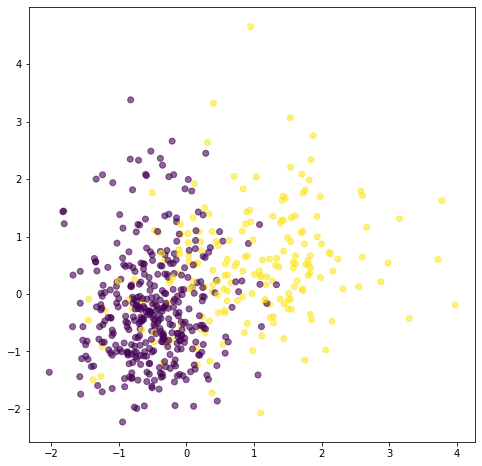

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(arr_data_scaled[:, 0], arr_data_scaled[:, 1], c=series_labels, alpha=0.6)

# **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**
The **quality** of DBSCAN **depends on the distance measure** (eps value) which should be chosen according to **the amount of columns** in a dataset. <br>
DBSCAN **should be used when you do not have a particular outcome variable** that you want to predict. Instead, you should have a set of features you want to use to **identify patterns across your dataset**. In general, DBSCAN is intended to be used in cases where **all of your features are numeric**.

The knee point is in the region of 4 and 8


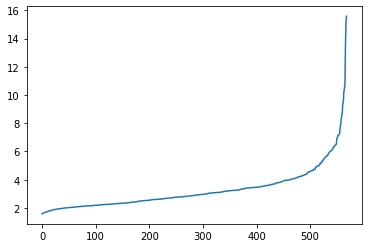

In [ ]:
# finding k-nearest neighbors
classifier_neighbors.fit(arr_data_scaled, target)
arr_neighbor_distances, arr_neighbor_indexes = classifier_neighbors.kneighbors(arr_data_scaled)

# determining the optimal eps parameter (the knee point)
arr_sorted_neighbor_distances = np.sort(arr_neighbor_distances, axis=0)
arr_knearest_distances = arr_sorted_neighbor_distances[:, 10]
plt.plot(arr_knearest_distances)
print("The knee point is in the region of 4 and 8")

In [ ]:
# clustering our data
classifier_dbscan = DBSCAN(eps=6, min_samples=4)
series_labels = pd.Series(classifier_dbscan.fit_predict(df_scaled))
print("Labels:")
series_labels.head(10)

Labels:


0    0
1    0
2    0
3   -1
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

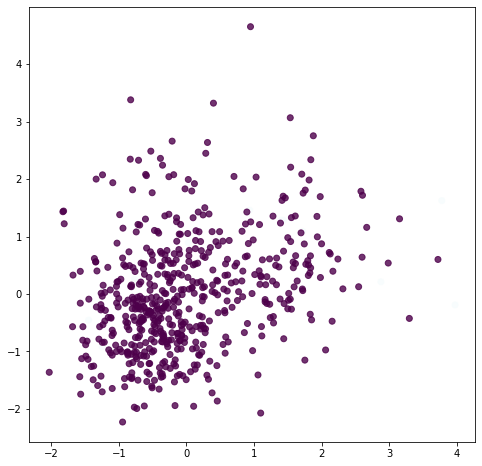

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(arr_data_scaled[:, 0], arr_data_scaled[:, 1], c=series_labels, alpha=0.8, cmap="BuPu")

# **Agglomerative clustering**
Agglomerative clustering is a type of Hierarchical clustering. It is a bottom up clustering technique that is very useful when **the number of clusters is unknown**

In [ ]:
# clustering our data
classifier_agglomerative = AgglomerativeClustering()
sereis_labels = pd.Series(classifier_agglomerative.fit_predict(df_scaled))
print("Labels:")
sereis_labels.head(10)

Labels:


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

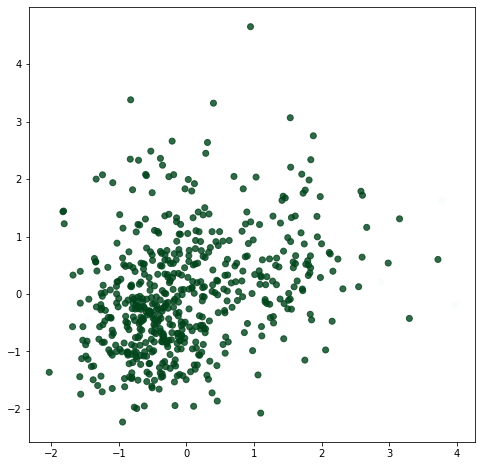

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(arr_data_scaled[:, 0], arr_data_scaled[:, 1], c=series_labels, alpha=0.8, cmap="BuGn")